In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
%matplotlib inline


In [118]:
city_data = pd.read_csv(r"C:\Users\Sony\Documents\GitHub\DataSets\City.csv")
customer_ID =pd.read_csv(r"C:\Users\Sony\Documents\GitHub\DataSets\Customer_ID.csv")
Transaction_ID = pd.read_csv(r"C:\Users\Sony\Documents\GitHub\DataSets\Transaction_ID.csv")

In [35]:
cab_data = pd.read_csv(r"C:\Users\Sony\Documents\GitHub\DataSets\Cab_Data.csv")

cab_data['Date of Travel'] = pd.to_datetime(cab_data['Date of Travel'],dayfirst='True',unit = 'D',origin = '30-12-1899')

cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [13]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  object 
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 19.2+ MB


In [14]:
cab_data.shape

(359392, 7)

In [15]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [16]:
city_data.shape

(20, 3)

In [17]:
customer_ID.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [18]:
customer_ID.shape

(49171, 4)

In [19]:
Transaction_ID.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [20]:
Transaction_ID.shape

(440098, 3)

In [21]:
cab_data.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [22]:
city_data.isnull().sum()

City          0
Population    0
Users         0
dtype: int64

In [23]:
customer_ID.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [24]:
Transaction_ID.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

In [36]:


cab_data['Date of Travel'] = pd.to_datetime(cab_data['Date of Travel'], format ='%d/%m/%Y')

In [37]:
months = []
years = []

for i in range (len(cab_data['Date of Travel'])):
    months.append(cab_data['Date of Travel'][i].month)
    years.append(cab_data['Date of Travel'][i].year)
cab_data['Month']= months
cab_data['Year'] = years





In [61]:
#Split Dataset into Pink and Yellow cab

pinkcab = cab_data[cab_data['Company']=='Pink Cab']

yellowcab = cab_data[cab_data['Company']=='Yellow Cab']

In [39]:
cab_data.drop('Date of Travel', axis =1,inplace=True)
cab_data.head()

,Transaction ID,Company,City,KM Travelled,Price Charged,Cost of Trip,Month,Year
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.635,1,2016
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.854,1,2016
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.632,1,2016
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.602,1,2016
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.776,1,2016


In [127]:
for col in cab_data.columns:
    if " " in col:
        cab_data = cab_data.rename(columns={col:col.replace(' ','_')})
        
for col in Transaction_ID.columns:
    if ' ' in col:
        Transaction_ID = Transaction_ID.rename(columns={col:col.replace(' ','_')})
        
for col in customer_ID.columns:
    if ' ' in col:
        customer_ID = customer_ID.rename(columns={col:col.replace(' ','_')})

year1 = cab_data[cab_data.Company=='Pink Cab'].groupby(['Year']).Transaction_ID.count()
year1

Year
2016    25080
2017    30321
2018    29310
Name: Transaction_ID, dtype: int64

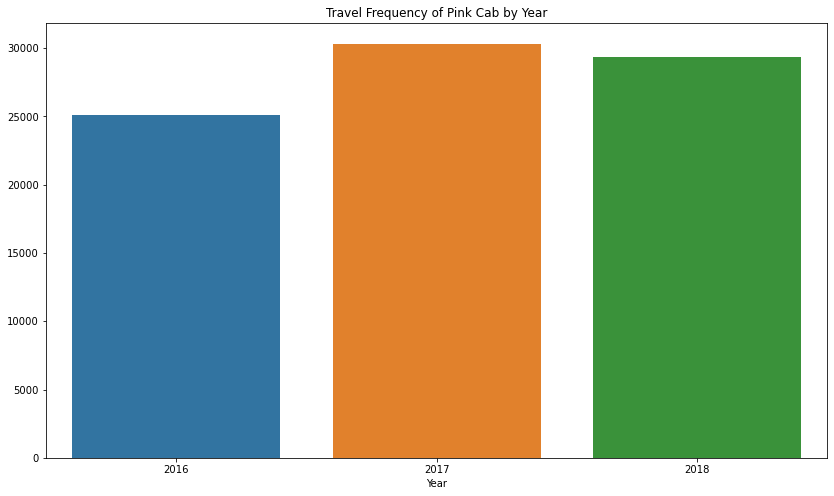

In [50]:
plt.figure(figsize=(14,8))
sns.barplot(x=year1.index,y=year1.values)
plt.title('Travel Frequency of Pink Cab by Year')
plt.show()

In [42]:
year2 = cab_data[cab_data.Company=='Yellow Cab'].groupby(['Year']).Transaction_ID.count()
year2

Year
2016    82239
2017    98189
2018    94253
Name: Transaction_ID, dtype: int64

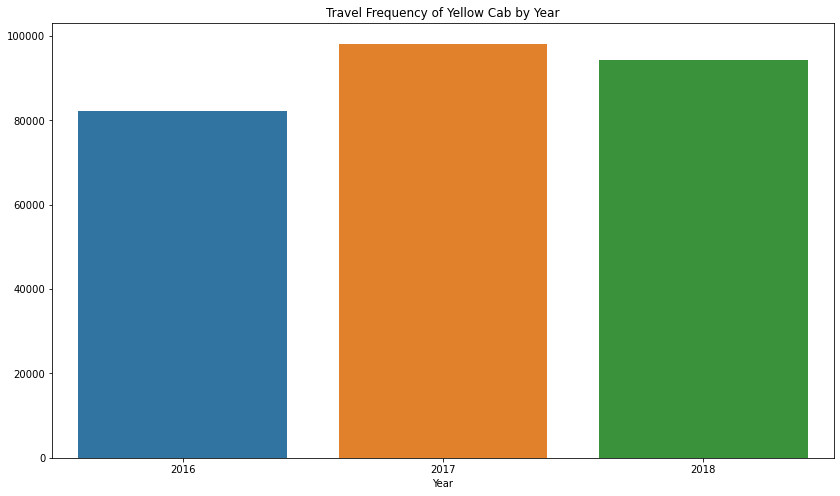

In [49]:
plt.figure(figsize=(14,8))
sns.barplot(x=year2.index,y=year2.values)
plt.title('Travel Frequency of Yellow Cab by Year')
plt.show()

### Yellow Cab has higher Transaction i.e People Prefer Yellow cab more than Pink cab 



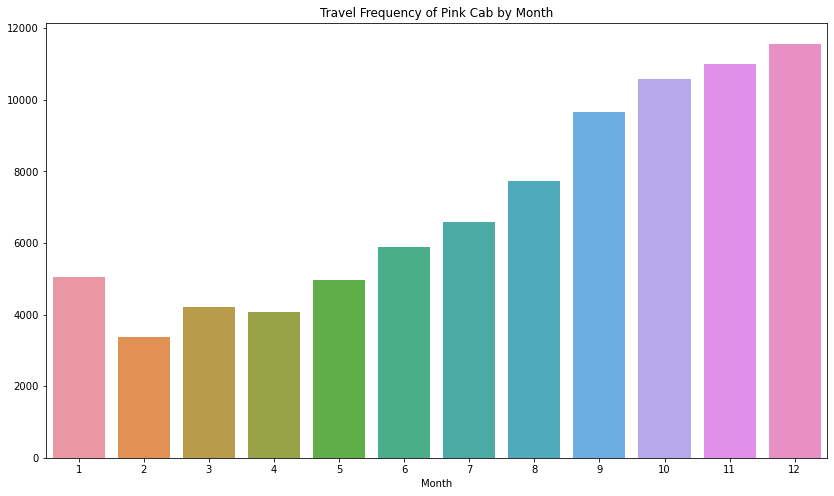

In [48]:
plt.figure(figsize=(14,8))
month1 = cab_data[cab_data.Company=='Pink Cab'].groupby(['Month']).Transaction_ID.count()
sns.barplot(x=month1.index,y=month1.values)
plt.title('Travel Frequency of Pink Cab by Month')
plt.show()

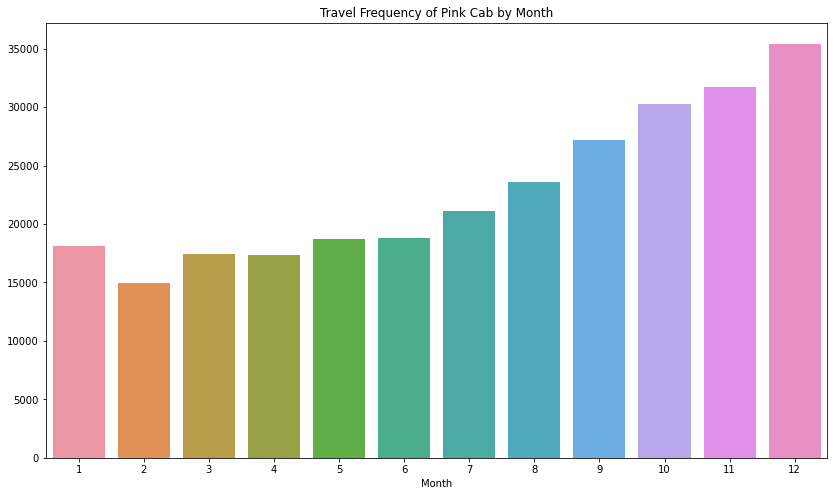

In [51]:
plt.figure(figsize=(14,8))
month2 = cab_data[cab_data.Company=='Yellow Cab'].groupby(['Month']).Transaction_ID.count()
sns.barplot(x=month2.index,y=month2.values)
plt.title('Travel Frequency of Pink Cab by Month')
plt.show()

### People ride Yellow cab more in the month of december which is also a holiday season.

In [75]:
pinkcab_distance = pinkcab['KM_Travelled'].describe()
yellowcab_distance = yellowcab['KM_Travelled'].describe()

df = pd.DataFrame({'PinkCab': pinkcab_distance.values,
                  'YellowCab': yellowcab_distance.values},
                  index= ['Count', 'Mean', 'Std. Dev.', 'Min', '25%', '50%', '75%', 'Max'])

df

,PinkCab,YellowCab
Count,84711.000000,274681.000000
Mean,22.559917,22.569517
Std. Dev.,12.231092,12.234298
Min,1.900000,1.900000
25%,12.000000,11.990000
50%,22.440000,22.440000
75%,32.960000,32.960000
Max,48.000000,48.000000


### Most of the people book ride for Maximum of 48km and Minimum of 2km

In [79]:
pinkcab_distance = pinkcab['Price_Charged'].describe()
yellowcab_distance = yellowcab['Price_Charged'].describe()

df = pd.DataFrame({'PinkCab': pinkcab_distance.values,
                  'YellowCab': yellowcab_distance.values},
                  index= ['Count', 'Mean', 'Std. Dev.', 'Min', '25%', '50%', '75%', 'Max'])

df

,PinkCab,YellowCab
Count,84711.000000,274681.000000
Mean,310.800856,458.181990
Std. Dev.,181.995661,288.386166
Min,15.600000,20.730000
25%,159.970000,226.680000
50%,298.060000,425.060000
75%,441.505000,633.880000
Max,1623.480000,2048.030000


###  On an Average Yellow Cab charges more than Pink Cab.

C:\Users\Sony\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sony\AppData\Local\Temp/ipykernel_1564/2994558805.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0, fontsize=12)
C:\Users\Sony\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sony\AppData\Local\Temp/ipykernel_1564/2994558805.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator


[Text(-10.0, 0, ''),
 Text(0.0, 0, ''),
 Text(10.0, 0, ''),
 Text(20.0, 0, ''),
 Text(30.0, 0, ''),
 Text(40.0, 0, ''),
 Text(50.0, 0, ''),
 Text(60.0, 0, '')]

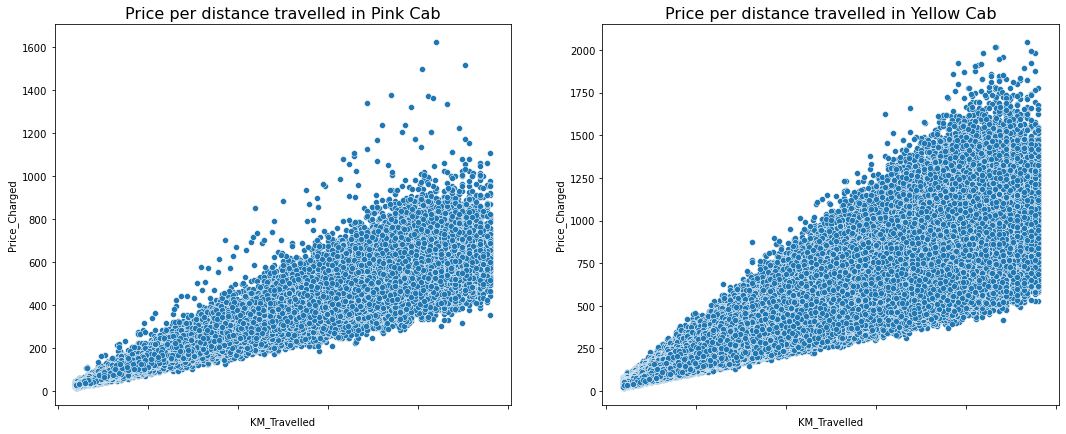

In [80]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 7))
sns.scatterplot(pinkcab['KM_Travelled'], pinkcab['Price_Charged'], ax=ax1)
ax1.set_title('Price per distance travelled in Pink Cab', fontsize=16)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0, fontsize=12)
sns.scatterplot(yellowcab['KM_Travelled'], yellowcab['Price_Charged'], ax=ax2)
ax2.set_title('Price per distance travelled in Yellow Cab', fontsize=16)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0, fontsize=12)

In [81]:
pinkcab['KM_Travelled'].corr(pinkcab['Price_Charged'])


0.9277652782594865

In [82]:
yellowcab['KM_Travelled'].corr(yellowcab['Price_Charged'])


0.8597086294478502



###  Pink Cab and Yellow Cab has Positive Corelation i.e As Distance Increases Price Increases.

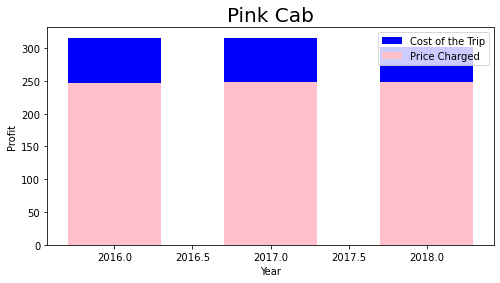

In [86]:
Year = cab_data[cab_data.Company=='Pink Cab'].groupby('Year').Transaction_ID.count()
Price_Charged = cab_data[cab_data.Company=='Pink Cab'].groupby('Year').Price_Charged.mean()
Cost_of_Trip = cab_data[cab_data.Company=='Pink Cab'].groupby('Year').Cost_of_Trip.mean()
plt.figure(figsize=(8,4))
ax = plt.subplot(111)
ax.bar( Year.index, Price_Charged.values, width=0.6, color='blue', align='center',label='Cost of the Trip')
ax.bar( Year.index, Cost_of_Trip.values, width=0.6, color='pink', align='center',label='Price Charged')
plt.ylabel('Profit')
plt.xlabel('Year')
plt.title('Pink Cab', fontsize=20)
plt.legend()
plt.show()

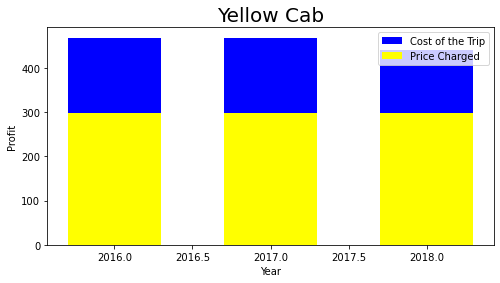

In [87]:
Year = cab_data[cab_data.Company=='Yellow Cab'].groupby('Year').Transaction_ID.count()
Price_Charged = cab_data[cab_data.Company=='Yellow Cab'].groupby('Year').Price_Charged.mean()
Cost_of_Trip = cab_data[cab_data.Company=='Yellow Cab'].groupby('Year').Cost_of_Trip.mean()
plt.figure(figsize=(8,4))
ax = plt.subplot(111)
ax.bar( Year.index, Price_Charged.values, width=0.6, color='blue', align='center',label='Cost of the Trip')
ax.bar( Year.index, Cost_of_Trip.values, width=0.6, color='yellow', align='center',label='Price Charged')
plt.ylabel('Profit')
plt.xlabel('Year')
plt.title('Yellow Cab', fontsize=20)
plt.legend()
plt.show()

### The Yellow Cab has higher Profit Margin Compared to Pink Cab

In [98]:
City = cab_data[cab_data.Company=='Pink Cab'].groupby(['City']).Transaction_ID.count()
City

City
ATLANTA GA         1762
AUSTIN TX          1868
BOSTON MA          5186
CHICAGO IL         9361
DALLAS TX          1380
DENVER CO          1394
LOS ANGELES CA    19865
MIAMI FL           2002
NASHVILLE TN       1841
NEW YORK NY       13967
ORANGE COUNTY      1513
PHOENIX AZ          864
PITTSBURGH PA       682
SACRAMENTO CA      1334
SAN DIEGO CA      10672
SEATTLE WA         2732
SILICON VALLEY     3797
TUCSON AZ           799
WASHINGTON DC      3692
Name: Transaction_ID, dtype: int64

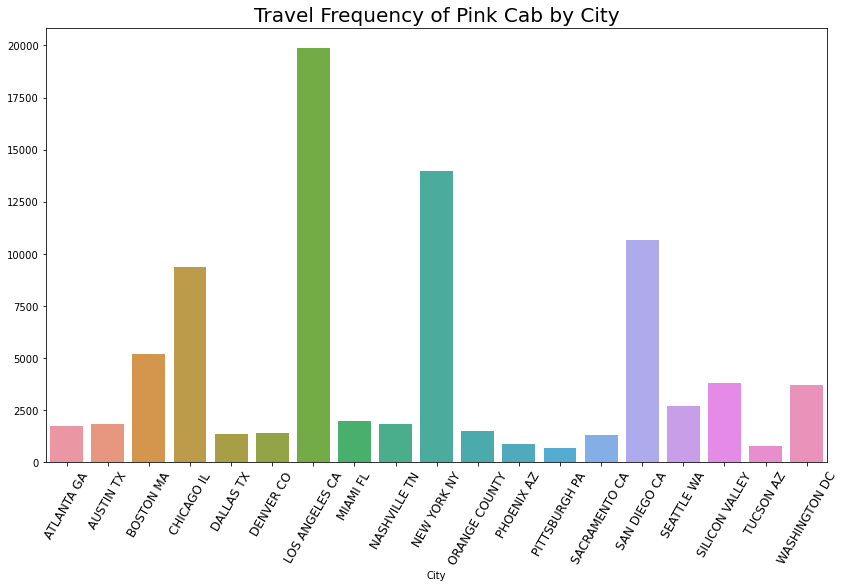

In [105]:
plt.figure(figsize=(14,8))
month1 = cab_data[cab_data.Company=='Pink Cab'].groupby(['City']).Transaction_ID.count()
sns.barplot(x=month1.index,y=month1.values)
plt.title('Travel Frequency of Pink Cab by City',fontsize =20)
plt.xticks(rotation = 60,fontsize =12)
plt.show()

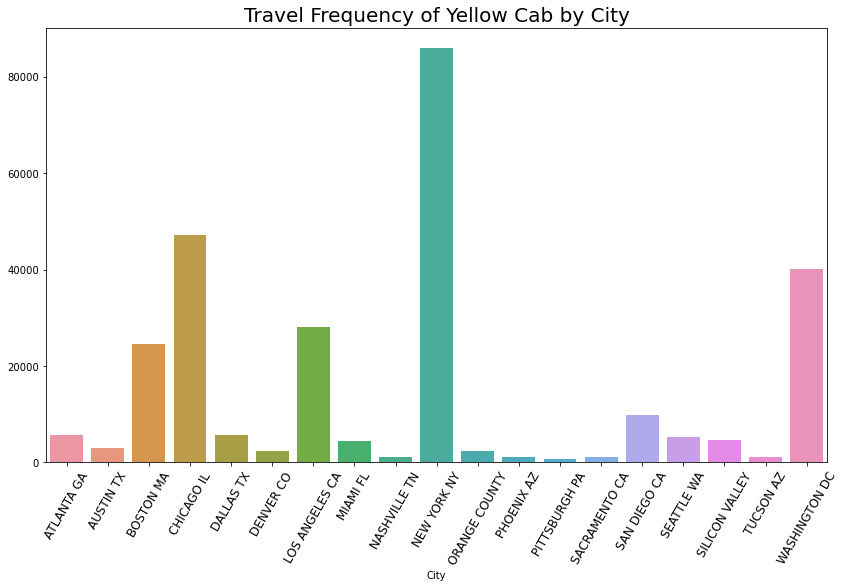

In [107]:
plt.figure(figsize=(14,8))
month1 = cab_data[cab_data.Company=='Yellow Cab'].groupby(['City']).Transaction_ID.count()
sns.barplot(x=month1.index,y=month1.values)
plt.title('Travel Frequency of Yellow Cab by City',fontsize =20)
plt.xticks(rotation = 60,fontsize =12)
plt.show()

### 1) Pink Cab has Highest Frequency in Los Angeles
### 2) Yellow Cab has Highest Frequency in New York.

Text(0.5, 0, 'Pink Cab Distance Travelled')

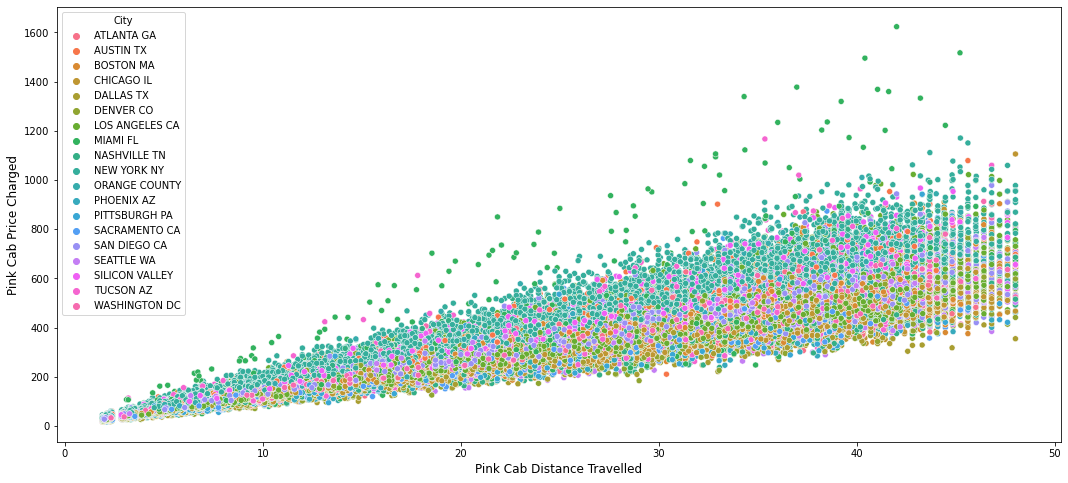

In [116]:
plt.figure(figsize=(18,8))
sns.scatterplot(data=cab_data, x=pinkcab["KM_Travelled"], y=pinkcab['Price_Charged'], hue="City")
plt.ylabel('Pink Cab Price Charged',fontsize =12)
plt.xlabel('Pink Cab Distance Travelled',fontsize =12)

### 1) From Above Graph it is Clear that For Pink Cab all cities have same increase in profit with distance.
### 2) For Yellow cab Price Charged is more in New York City.

In [147]:
left = cab_data.set_index(['Transaction_ID'])
right = Transaction_ID.set_index(['Transaction_ID'])
df = left.join(right)

left = df.set_index([df.index,'Customer_ID'])
right = customer_ID.set_index(['Customer_ID'])
df = left.join(right)

left = df.set_index([df.index,'City'])
right = city_data.set_index(['City'])
df = left.join(right)
df.head()


,,,Company,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users
Transaction_ID,Customer_ID,City,,,,,,,,,,,,
10000011,29290,ATLANTA GA,Pink Cab,30.45,370.95,313.635,1,2016,Card,Male,28,10813,"814,885","24,701"
10000012,27703,ATLANTA GA,Pink Cab,28.62,358.52,334.854,1,2016,Card,Male,27,9237,"814,885","24,701"
10000013,28712,ATLANTA GA,Pink Cab,9.04,125.20,97.632,1,2016,Cash,Male,53,11242,"814,885","24,701"
10000014,28020,ATLANTA GA,Pink Cab,33.17,377.40,351.602,1,2016,Cash,Male,23,23327,"814,885","24,701"
10000015,27182,ATLANTA GA,Pink Cab,8.73,114.62,97.776,1,2016,Card,Male,33,8536,"814,885","24,701"


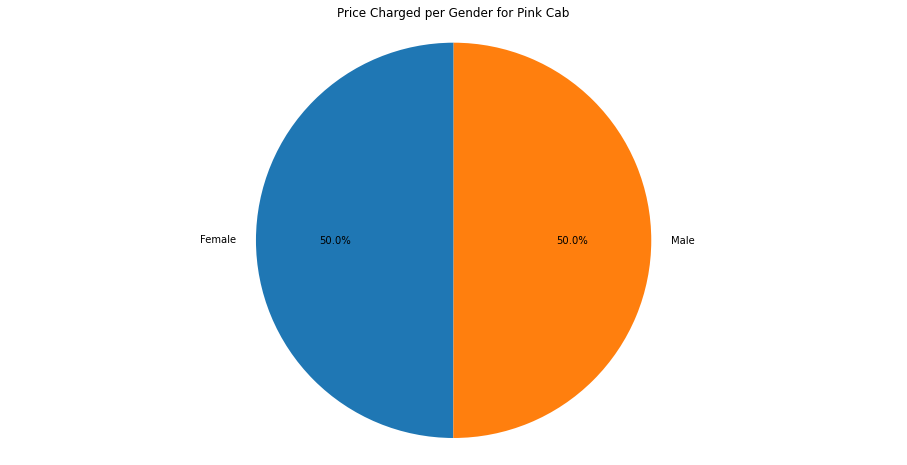

In [140]:
gender=df[df.Company=='Pink Cab'].groupby('Gender').Price_Charged.mean()
Y = gender.index
X = gender.values
figp, axp = plt.subplots(figsize=(16,8))
axp.pie(X , labels=Y, autopct='%1.1f%%', startangle=90,)
axp.axis('equal')

plt.title('Price Charged per Gender for Pink Cab')
plt.show()

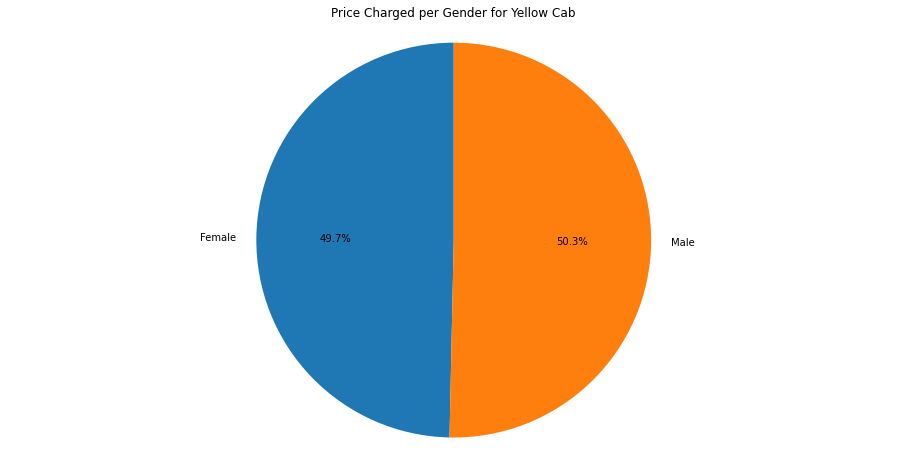

In [141]:
gender=df[df.Company=='Yellow Cab'].groupby('Gender').Price_Charged.mean()
Y = gender.index
X = gender.values
figp, axp = plt.subplots(figsize=(16,8))
axp.pie(X , labels=Y, autopct='%1.1f%%', startangle=90,)
axp.axis('equal')

plt.title('Price Charged per Gender for Yellow Cab')
plt.show()

### 1) Pink Cab Charges same from both Genders
### 2) Yellow cab Charges Less from Female 

In [153]:
df['Margins'] = (df['Price_Charged']-df['Cost_of_Trip'])
df.head()


,,,Company,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year,Payment_Mode,Gender,Age,Income_(USD/Month),Population,Users,Margins
Transaction_ID,Customer_ID,City,,,,,,,,,,,,,
10000011,29290,ATLANTA GA,Pink Cab,30.45,370.95,313.635,1,2016,Card,Male,28,10813,"814,885","24,701",57.315
10000012,27703,ATLANTA GA,Pink Cab,28.62,358.52,334.854,1,2016,Card,Male,27,9237,"814,885","24,701",23.666
10000013,28712,ATLANTA GA,Pink Cab,9.04,125.20,97.632,1,2016,Cash,Male,53,11242,"814,885","24,701",27.568
10000014,28020,ATLANTA GA,Pink Cab,33.17,377.40,351.602,1,2016,Cash,Male,23,23327,"814,885","24,701",25.798
10000015,27182,ATLANTA GA,Pink Cab,8.73,114.62,97.776,1,2016,Card,Male,33,8536,"814,885","24,701",16.844


In [155]:
city2 = df[df.Company=='Pink Cab'].groupby('City').Margins.mean()
city2

City
ATLANTA GA         54.511961
AUSTIN TX          78.932168
BOSTON MA          50.520960
CHICAGO IL         34.047910
DALLAS TX          17.920371
DENVER CO          29.114016
LOS ANGELES CA     56.669120
MIAMI FL           81.069526
NASHVILLE TN       34.918269
NEW YORK NY       108.217540
ORANGE COUNTY      67.412976
PHOENIX AZ         41.199530
PITTSBURGH PA      25.084660
SACRAMENTO CA      41.472273
SAN DIEGO CA       59.772280
SEATTLE WA         41.281601
SILICON VALLEY     89.610358
TUCSON AZ          74.204725
WASHINGTON DC      52.482761
Name: Margins, dtype: float64

In [160]:
city3 = df[df.Company=='Yellow Cab'].groupby('City').Margins.mean()
city3

City
ATLANTA GA        128.797723
AUSTIN TX         125.249582
BOSTON MA          61.483619
CHICAGO IL         64.924486
DALLAS TX         195.849415
DENVER CO         146.853175
LOS ANGELES CA    116.656368
MIAMI FL          133.872429
NASHVILLE TN       72.923597
NEW YORK NY       307.864252
ORANGE COUNTY     143.785355
PHOENIX AZ        131.120407
PITTSBURGH PA     107.857716
SACRAMENTO CA      60.021471
SAN DIEGO CA       96.706775
SEATTLE WA         93.428968
SILICON VALLEY    206.788383
TUCSON AZ          71.529258
WASHINGTON DC      82.384912
Name: Margins, dtype: float64

### Both Pink Cab and Yellow Cab Has highest margins in New York

# HYPOTHESIS TESTING

## Null Hypothesis:Margin remain the same for Gender for both Yellow Cab & Pink Cab

In [166]:
Pink1 = df[(df.Gender=='Female')&(df.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()
Pink2 = df[(df.Gender=='Male')&(df.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()


from scipy import stats
_,p_value = stats.ttest_ind(Pink1.values,b=Pink2.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that there is a difference in Margin')
else:
    print('We accept null hypothesis that there is no difference in Margin')
    
print('P value is ', p_value)

We accept null hypothesis that there is no difference in Margin
P value is  0.11515305900425798


In [167]:
Yellow1 = df[(df.Gender=='Female')&(df.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()
Yellow2 = df[(df.Gender=='Male')&(df.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()


from scipy import stats
_,p_value = stats.ttest_ind(Yellow1.values,b=Yellow2.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that there is a difference in Margin')
else:
    print('We accept null hypothesis that there is no difference in Margin')
    
print('P value is ', p_value)

We accept alternate hypothesis that there is a difference in Margin
P value is  6.060473042494144e-25


### Thus, We can Conclude,

### 1) For Pink Cab There is no difference in Margin With respect to gender.

### 2) For Yellow Cab There is a difference in Margin With respect to gender.



## Null Hypothesis: There is no difference in Margin with respect to age.

In [168]:
df[df.Age<=50].groupby('Company').Margins.mean()

Company
Pink Cab       62.765586
Yellow Cab    161.081921
Name: Margins, dtype: float64

In [169]:
df[df.Age>50].groupby('Company').Margins.mean()

Company
Pink Cab       62.053044
Yellow Cab    155.855885
Name: Margins, dtype: float64

In [173]:
Pink3 = df[(df.Age<=50)&(df.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()
Pink4 = df[(df.Age>50)&(df.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()

from scipy import stats
_, p_value = stats.ttest_ind(Pink3.values,b=Pink4.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that there is a difference in Margin')
else:
    print('We accept null hypothesis that there is no difference in Margin')
    
print('P value is ', p_value)

We accept null hypothesis that there is no difference in Margin
P value is  0.32817487547980695


In [174]:
Yellow3 = df[(df.Age<=50)&(df.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()
Yellow4 = df[(df.Age>50)&(df.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()

from scipy import stats
_, p_value = stats.ttest_ind(Yellow3.values,b=Yellow4.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that there is a difference in Margin')
else:
    print('We accept null hypothesis that there is no difference in Margin')
    
print('P value is ', p_value)

We accept alternate hypothesis that there is a difference in Margin
P value is  6.494256817799368e-09


### Thus, We can Conclude,

### 1) For Pink Cab There is no difference in Margin With respect to age .

### 2) For Yellow Cab There is a difference in Margin With respect to age.



## Null Hypothesis: There is no difference in Margin with respect to Payment Method

In [177]:
Pink5 = df[(df.Payment_Mode=='Cash')&(df.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()
Pink6 = df[(df.Payment_Mode=='Card')&(df.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()


_, p_value = stats.ttest_ind(Pink5.values,Pink6.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that there is a difference in Margin')
else:
    print('We accept null hypothesis that there is no difference in Margin')
    
print('P value is ', p_value)

We accept null hypothesis that there is no difference in Margin
P value is  0.7900465828793288


In [178]:
Yellow5 = df[(df.Payment_Mode=='Cash')&(df.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()
Yellow6 = df[(df.Payment_Mode=='Card')&(df.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()


_, p_value = stats.ttest_ind(Yellow5.values,Yellow6.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that there is a difference in Margin')
else:
    print('We accept null hypothesis that there is no difference in Margin')
    
print('P value is ', p_value)

We accept null hypothesis that there is no difference in Margin
P value is  0.2933060638298729


### Thus, We can Conclude,

### 1) For Pink Cab There is no difference in Margin With respect to Payment Method .

### 2) For Yellow Cab There is no difference in Margin With respect to Payment Method.

